In [32]:
import pandas as pd
import matplotlib a
data = {
    'ID': [1, 2, 3, 4, 5],
    'Nom': ['Dupont', 'Martin', 'Bernard', 'Petit', 'Durand'],
    'Prénom': ['Jean', 'Sophie', 'Luc', 'Emma', 'Pierre'],
    'Classe': ['TerminaleA', 'TerminaleB', 'TerminaleA', 'PremièreC', 'TerminaleB'],
    'Maths': [15, 18, 11, 16, None],
    'Physique': [12, None, 14, 13, 16],
    'Français': [14, 13, 12, 17, 10],
    'Histoire': [16, 15, 10, 14, 13],
    'Génie': [8, 12, 15, 11, 9]
}
df = pd.DataFrame(data)
df.to_csv('eleve.csv', index=False)

In [3]:
df.head()

,ID,Nom,Prénom,Classe,Maths,Physique,Français,Histoire,Génie
0,1,Dupont,Jean,TerminaleA,15.0,12.0,14,16,8
1,2,Martin,Sophie,TerminaleB,18.0,NaN,13,15,12
2,3,Bernard,Luc,TerminaleA,11.0,14.0,12,10,15
3,4,Petit,Emma,PremièreC,16.0,13.0,17,14,11
4,5,Durand,Pierre,TerminaleB,NaN,16.0,10,13,9


In [5]:
df.describe()

,ID,Maths,Physique,Français,Histoire,Génie
count,5.000000,4.00000,4.000000,5.000000,5.000000,5.000000
mean,3.000000,15.00000,13.750000,13.200000,13.600000,11.000000
std,1.581139,2.94392,1.707825,2.588436,2.302173,2.738613
min,1.000000,11.00000,12.000000,10.000000,10.000000,8.000000
25%,2.000000,14.00000,12.750000,12.000000,13.000000,9.000000
50%,3.000000,15.50000,13.500000,13.000000,14.000000,11.000000
75%,4.000000,16.50000,14.500000,14.000000,15.000000,12.000000
max,5.000000,18.00000,16.000000,17.000000,16.000000,15.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        5 non-null      int64  
 1   Nom       5 non-null      object 
 2   Prénom    5 non-null      object 
 3   Classe    5 non-null      object 
 4   Maths     4 non-null      float64
 5   Physique  4 non-null      float64
 6   Français  5 non-null      int64  
 7   Histoire  5 non-null      int64  
 8   Génie     5 non-null      int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 492.0+ bytes


#remplacer les NaN par la myoenne de la colonne

In [8]:
df.fillna(df.mean(numeric_only=True))

,ID,Nom,Prénom,Classe,Maths,Physique,Français,Histoire,Génie
0,1,Dupont,Jean,TerminaleA,15.0,12.00,14,16,8
1,2,Martin,Sophie,TerminaleB,18.0,13.75,13,15,12
2,3,Bernard,Luc,TerminaleA,11.0,14.00,12,10,15
3,4,Petit,Emma,PremièreC,16.0,13.00,17,14,11
4,5,Durand,Pierre,TerminaleB,15.0,16.00,10,13,9


In [12]:
df.fillna(df.mean(numeric_only=True), inplace=True)

#ajouter une colonne moyenne_generale avec une valeur par defaut=0

In [44]:
df["moyenne_general"]=0

#calculer la moyenne pour chaque eleve

In [45]:
df.moyenne_general = df[["Maths","Physique","Français","Histoire","Génie"]].mean(axis=1)

In [23]:
df

,ID,Nom,Prénom,Classe,Maths,Physique,Français,Histoire,Génie,moyenne_general
0,1,Dupont,Jean,TerminaleA,15.0,12.00,14,16,8,13.00
1,2,Martin,Sophie,TerminaleB,18.0,13.75,13,15,12,14.35
2,3,Bernard,Luc,TerminaleA,11.0,14.00,12,10,15,12.40
3,4,Petit,Emma,PremièreC,16.0,13.00,17,14,11,14.20
4,5,Durand,Pierre,TerminaleB,15.0,16.00,10,13,9,12.60


#calculer la moyenne en Maths par classe

In [26]:
df.groupby("Classe").Maths.mean().sort_values(ascending=False)

Classe
TerminaleB    16.5
PremièreC     16.0
TerminaleA    13.0
Name: Maths, dtype: float64

#l'eleve qui a la plus haute moyenne

In [31]:
df.nlargest(3, "moyenne_general")[["Nom","Prénom","Classe","moyenne_general"]]

,Nom,Prénom,Classe,moyenne_general
1,Martin,Sophie,TerminaleB,14.35
3,Petit,Emma,PremièreC,14.20
0,Dupont,Jean,TerminaleA,13.00


<Axes: title={'center': 'Distributino des moyenne'}, ylabel='Frequency'>

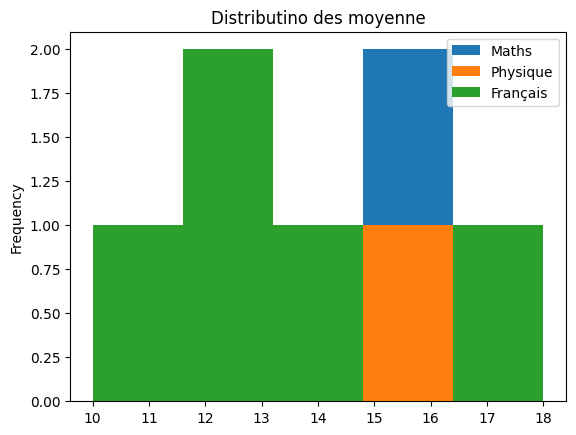

In [40]:
df[["Maths","Physique","Français"]].plot.hist(title='Distributino des moyenne',bins=5)


In [38]:
df.columns.tolist()

['ID',
 'Nom',
 'Prénom',
 'Classe',
 'Maths',
 'Physique',
 'Français',
 'Histoire',
 'Génie']

<Axes: >

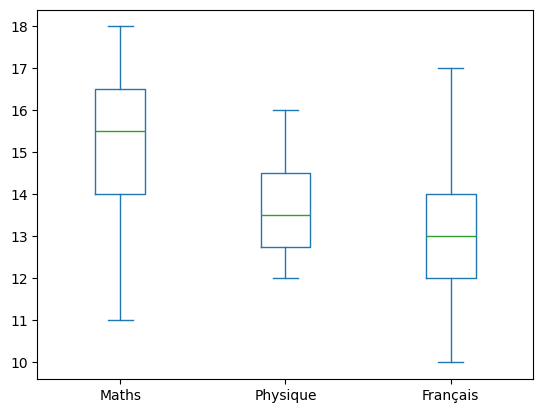

In [41]:
df[['Maths', 'Physique', 'Français']].plot.box()

In [49]:
df["Resultat"]="default"

In [46]:
df

,ID,Nom,Prénom,Classe,Maths,Physique,Français,Histoire,Génie,Resultat,moyenne_general
0,1,Dupont,Jean,TerminaleA,15.0,12.0,14,16,8,default,13.0
1,2,Martin,Sophie,TerminaleB,18.0,NaN,13,15,12,default,14.5
2,3,Bernard,Luc,TerminaleA,11.0,14.0,12,10,15,default,12.4
3,4,Petit,Emma,PremièreC,16.0,13.0,17,14,11,default,14.2
4,5,Durand,Pierre,TerminaleB,NaN,16.0,10,13,9,default,12.0


In [47]:
del df["Resultat"]

In [50]:
df

,ID,Nom,Prénom,Classe,Maths,Physique,Français,Histoire,Génie,moyenne_general,Resultat
0,1,Dupont,Jean,TerminaleA,15.0,12.0,14,16,8,13.0,default
1,2,Martin,Sophie,TerminaleB,18.0,NaN,13,15,12,14.5,default
2,3,Bernard,Luc,TerminaleA,11.0,14.0,12,10,15,12.4,default
3,4,Petit,Emma,PremièreC,16.0,13.0,17,14,11,14.2,default
4,5,Durand,Pierre,TerminaleB,NaN,16.0,10,13,9,12.0,default


#afficher admis si moyenne_general >12.30 sinon echec

In [51]:
df.Resultat = df.moyenne_general.apply(lambda x: 'admis' if x>=12.30 else 'echec')

#exporter vers un autre fichier csv

In [54]:
df.to_csv('resultats_scolaires.xlsx', index=False)

In [52]:
df

,ID,Nom,Prénom,Classe,Maths,Physique,Français,Histoire,Génie,moyenne_general,Resultat
0,1,Dupont,Jean,TerminaleA,15.0,12.0,14,16,8,13.0,admis
1,2,Martin,Sophie,TerminaleB,18.0,NaN,13,15,12,14.5,admis
2,3,Bernard,Luc,TerminaleA,11.0,14.0,12,10,15,12.4,admis
3,4,Petit,Emma,PremièreC,16.0,13.0,17,14,11,14.2,admis
4,5,Durand,Pierre,TerminaleB,NaN,16.0,10,13,9,12.0,echec
